# **Please rund the code chunk in sequence **

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
url1="https://raw.githubusercontent.com/ZainabMCheema/Exploratory-Data-Analysis/main/Human%20Activity%20Classifiction%20Dataset/metadata.csv"
url_2="https://raw.githubusercontent.com/ZainabMCheema/Exploratory-Data-Analysis/main/Human%20Activity%20Classifiction%20Dataset/metadata_test.csv"
url_3="https://raw.githubusercontent.com/ZainabMCheema/Exploratory-Data-Analysis/main/Human%20Activity%20Classifiction%20Dataset/metadata_kaggle.csv"
df_metadata=pd.read_csv(url1)
df_metadata_test=pd.read_csv(url_2)
df_metadata_kaggle=pd.read_csv(url_3)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#file_path='/content/drive/My Drive/Machine Learning- Session/Course Work Project/metadata.csv' #zainab's
#file_path1='/content/drive/My Drive/Machine Learning- Session/Course Work Project/metadata_test.csv' #zainab's
#file_path2='/content/drive/My Drive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #zainab's
#df_metadata=pd.read_csv(file_path)
#df_metadata_test=pd.read_csv(file_path1)
#df_metadata_kaggle=pd.read_csv(file_path2)

Mounted at /content/drive


In [12]:
# Extract features and target
X = df_metadata.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_metadata['activity']
X_test_df = df_metadata_test.drop(columns=['activity', 'user_snippet'])
y_test_df = df_metadata_test['activity']
X_kaggle = df_metadata_kaggle.drop(columns=['user_snippet'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Feature scaling using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
X_test_df_scaled = scaler.transform(X_test_df)
X_kaggle_scaled = scaler.transform(X_kaggle)

In [15]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train_scaled, y_train)



KNeighborsClassifier()

In [16]:
y_pred = knn_classifier.predict(X_test_scaled)
from tabulate import tabulate
class_report_str = classification_report(y_test, y_pred)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report KNN Model")
print(tabulate(data, headers=headers, tablefmt='grid'))

Classification Report KNN Model
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.84        |     0.8  |       0.82 |    138    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.98        |     1    |       0.99 |    394    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 1.00        |     1    |       1    |     70    |
+------------+-------------+----------+------------+-----------+
| Standing   | 0.98        |     0.96 |       0.97 |     50    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.90        |     0.75 |       0.82 |    138    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.95        |     0.99 |       0.97 |    472    |
+------------+-------------+----------+------------+------

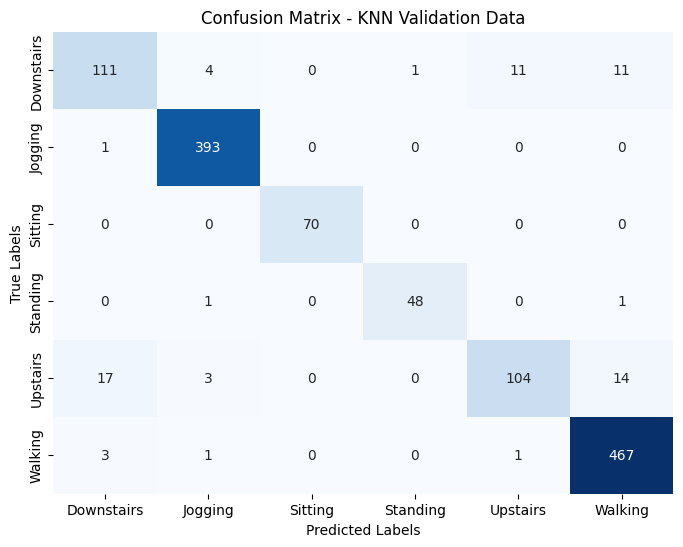

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get unique labels
labels = sorted(y_test.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - KNN Validation Data")
plt.show()

In [18]:
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_test)

Accuracy: 0.945324881141046


In [ ]:
# Predict on the test set
y_pred_test = knn_classifier.predict(X_test_df_scaled)



class_report_str = classification_report(y_test_df, y_pred_test)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report KNN Model")
print(tabulate(data, headers=headers, tablefmt='grid'))

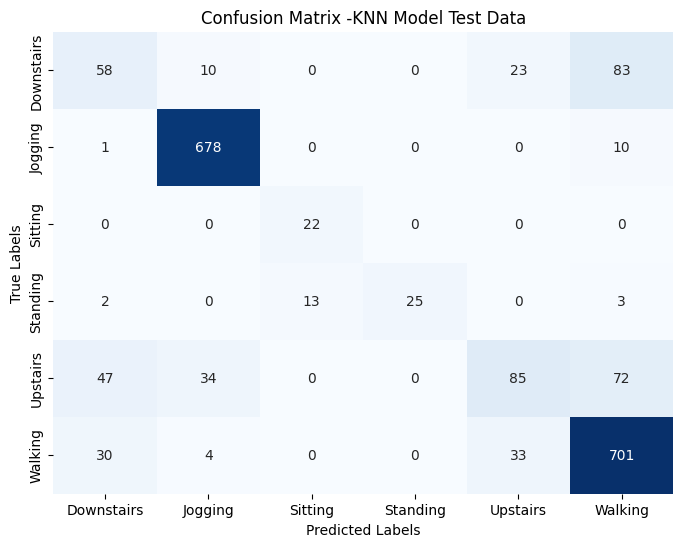

In [20]:
# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix -KNN Model Test Data")
plt.show()

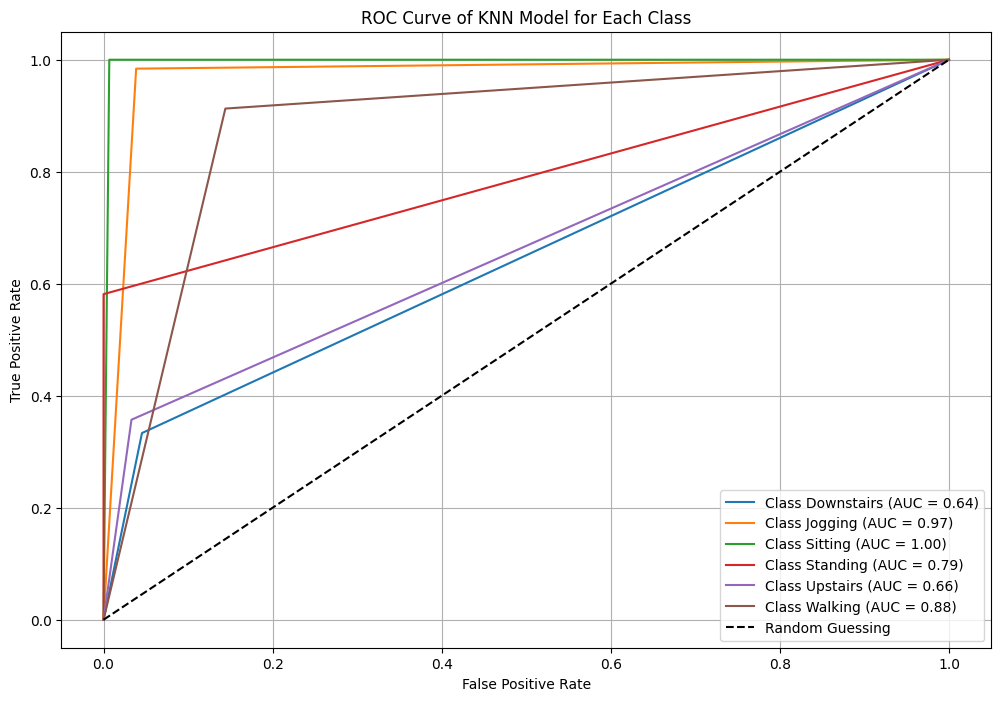

In [21]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test_df == label, y_pred_test == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN Model for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:

accuracy_test = accuracy_score(y_test_df, y_pred_test)
print("Accuracy:", accuracy_test)

Accuracy: 0.8071354705274043


In [ ]:
y_kaggle_pred = knn_classifier.predict(X_kaggle_scaled)
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_KNN_sandbox.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = y_kaggle_pred
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_KNN_sandbox.csv


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {'n_neighbors': [3,4,5],
              'leaf_size': [40,45,50]}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [40, 45, 50], 'n_neighbors': [3, 4, 5]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_params

{'leaf_size': 40, 'n_neighbors': 3}

In [ ]:
best_score

0.9344332688967608

In [ ]:

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9405705229793978


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

n_folds = 5
# Initialize KFold cross-validation splitter
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.94455446 0.93465347 0.92772277 0.91278494 0.94152626]
Mean CV Score: 0.9322483784552885
Standard Deviation of CV Scores: 0.011336753035658769


In [ ]:
best_knn = grid_search.best_estimator_
y_pred_test2 = best_knn.predict(X_test_df_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_df, y_pred_test2)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8195449844881075


In [ ]:


class_report_str = classification_report(y_test_df, y_pred_test2)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report KNN Model 3")
print(tabulate(data, headers=headers, tablefmt='grid'))

Classification Report KNN Model 3
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.44        |     0.39 |       0.41 |    174    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.94        |     0.98 |       0.96 |    689    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 1.00        |     1    |       1    |     22    |
+------------+-------------+----------+------------+-----------+
| Standing   | 1.00        |     0.86 |       0.92 |     43    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.58        |     0.31 |       0.4  |    238    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.81        |     0.92 |       0.86 |    768    |
+------------+-------------+----------+------------+----

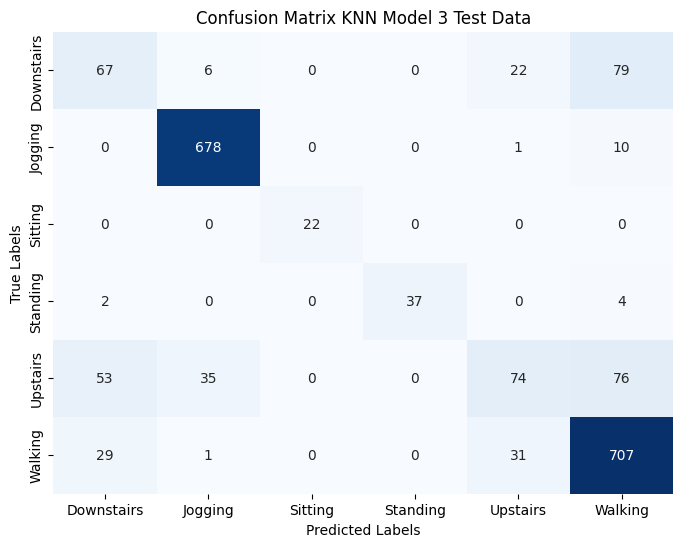

In [ ]:
# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df, y_pred_test2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN Model 3 Test Data")
plt.show()

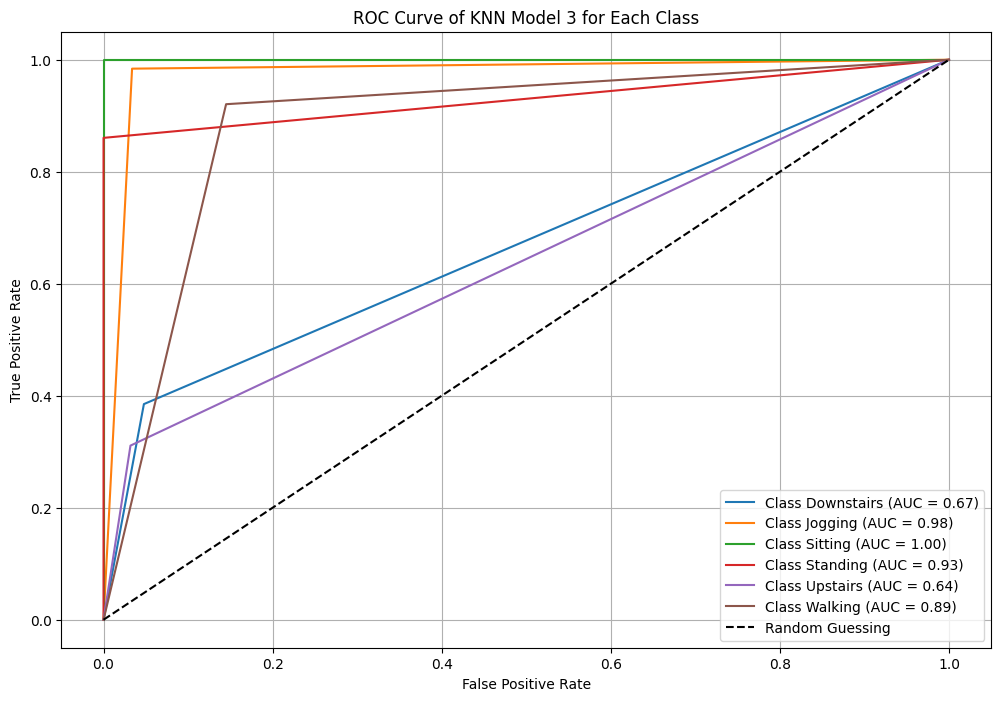

In [ ]:
plt.figure(figsize=(12, 8))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test_df == label, y_pred_test2 == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN Model 3 for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
y_kaggle_pred = best_knn.predict(X_kaggle_scaled)
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_KNN2_kaggle.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = y_kaggle_pred
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)


Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_KNN2_kaggle.csv


# CNN Model

In [22]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

In [23]:
# Define input shape
input_shape = X_train_scaled.shape[1:]

# Define number of classes
num_classes = 6


In [24]:
# Define CNN Architecture
model = models.Sequential([
    layers.Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [25]:
import numpy as np

# Check data type of X_train_scaled
print("Data type of X_train_scaled:", X_train_scaled.dtype)

# Check data type of y_train
print("Data type of y_train:", y_train.dtype)

Data type of X_train_scaled: float64
Data type of y_train: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to numerical labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
#  Train the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (5048, 30)
X_test_scaled shape: (1262, 30)


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_train_scaled, y_train_encoded)

# Print the evaluation results
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

158/158 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9150
Validation Loss: 0.23281937837600708
Validation Accuracy: 0.9150158762931824


In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)

# Print the evaluation results
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

40/40 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.9002
Validation Loss: 0.2555358111858368
Validation Accuracy: 0.9001584649085999


In [ ]:
predictions = model.predict(X_kaggle_scaled)

# Print the predictions
print(predictions)

79/79 [==============================] - 0s 2ms/step
[[1.5046673e-01 2.4720468e-04 1.0263737e-05 1.1081643e-06 2.0349494e-01
  6.4577973e-01]
 [8.8517654e-10 6.3689196e-13 9.9999994e-01 2.6092770e-09 1.8257081e-09
  1.7884081e-14]
 [1.5510927e-01 1.6330339e-03 8.2526887e-05 1.0673689e-05 4.4538352e-01
  3.9778087e-01]
 ...
 [1.2466210e-08 9.9999899e-01 2.1389683e-11 1.7068757e-12 3.9054780e-07
  5.4900028e-07]
 [2.7242419e-03 1.1697308e-02 1.0859883e-06 6.0946900e-07 2.6068010e-04
  9.8531610e-01]
 [5.5986059e-01 2.0684097e-03 2.1911609e-04 2.1591001e-04 3.3699337e-01
  1.0064269e-01]]


In [ ]:
predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Print the predicted class labels
print(predicted_labels)

['Walking' 'Sitting' 'Walking' ... 'Jogging' 'Walking' 'Downstairs']


In [ ]:

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions CNN_kaggle.csv' #zainab
# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = predicted_labels
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions CNN_kaggle.csv


# Regularization Technique on Model

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers, regularizers

from tensorflow.keras import models, layers, regularizers

# Define CNN Architecture with L2 Regularization and Early Stopping
model_2 = models.Sequential([
    layers.Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Output layer with 6 units
])


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_19. Consider increasing the input size. Received input shape [None, 1, 64] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)
model_2.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with Early Stopping
history = model_2.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_train_scaled, y_train_encoded), callbacks=[early_stopping])

Epoch 1/100
158/158 [==============================] - 3s 11ms/step - loss: 2.0453 - accuracy: 0.1395 - val_loss: 1.9452 - val_accuracy: 0.2944
Epoch 2/100
158/158 [==============================] - 2s 12ms/step - loss: 1.8859 - accuracy: 0.3978 - val_loss: 1.8047 - val_accuracy: 0.6379
Epoch 3/100
158/158 [==============================] - 1s 8ms/step - loss: 1.7594 - accuracy: 0.5915 - val_loss: 1.6786 - val_accuracy: 0.6819
Epoch 4/100
158/158 [==============================] - 1s 7ms/step - loss: 1.6473 - accuracy: 0.6496 - val_loss: 1.5687 - val_accuracy: 0.6939
Epoch 5/100
158/158 [==============================] - 1s 7ms/step - loss: 1.5482 - accuracy: 0.6773 - val_loss: 1.4724 - val_accuracy: 0.6961
Epoch 6/100
158/158 [==============================] - 1s 7ms/step - loss: 1.4665 - accuracy: 0.6874 - val_loss: 1.3880 - val_accuracy: 0.6997
Epoch 7/100
158/158 [==============================] - 1s 7ms/step - loss: 1.3918 - accuracy: 0.6918 - val_loss: 1.3177 - val_accuracy: 0.70

In [ ]:
loss, accuracy = model_2.evaluate(X_test_scaled, y_test_encoded)

# Print the evaluation results
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

40/40 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9358
Validation Loss: 0.211532324552536
Validation Accuracy: 0.9358161687850952


In [ ]:
predictions2 = model_2.predict(X_kaggle_scaled)
predicted_labels_encoded = np.argmax(predictions2, axis=1)
predicted_labels_2 = label_encoder.inverse_transform(predicted_labels_encoded)

# Print the predicted class labels
print(predicted_labels_2)

NameError: name 'model_2' is not defined

In [ ]:
# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions CNN_M6_kaggle.csv' #zainab
# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = predicted_labels_2
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions CNN_M6_kaggle.csv
